In [28]:
import dataloader
import os
from matplotlib import pyplot as plt
from torch.utils.data.dataloader import DataLoader
import numpy as np
import random
import torch

In [29]:
path = '/home/localadmin/segthor/data/train_resampled2_2_25'

In [30]:
series = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
train_set = dataloader.SimpleReader(path=path,patch_size=(128,128,128), series=series, multiplier=2, patches_from_single_image=2)

['Patient_01', 'Patient_02', 'Patient_03', 'Patient_04', 'Patient_05', 'Patient_06', 'Patient_07', 'Patient_08', 'Patient_09', 'Patient_10', 'Patient_11', 'Patient_12', 'Patient_13', 'Patient_14', 'Patient_15', 'Patient_16', 'Patient_17', 'Patient_18', 'Patient_19', 'Patient_20', 'Patient_21', 'Patient_22', 'Patient_23', 'Patient_24', 'Patient_25', 'Patient_26', 'Patient_27', 'Patient_28', 'Patient_29', 'Patient_30', 'Patient_31', 'Patient_32', 'Patient_33', 'Patient_34', 'Patient_35', 'Patient_36', 'Patient_37', 'Patient_38', 'Patient_39', 'Patient_40']


In [31]:
def worker_init_fn(worker_id):
    seed = np.random.get_state()[1][0] + worker_id
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    print('worker id {} seed {}'.format(worker_id, seed))

In [32]:
training_data_loader = DataLoader(dataset=train_set, num_workers=8,
                                      batch_size=6, shuffle=True, drop_last=True, worker_init_fn=worker_init_fn)

worker id 0 seed 3045032298
worker id 1 seed 3045032299
worker id 2 seed 3045032300
worker id 3 seed 3045032301
worker id 4 seed 3045032302
worker id 5 seed 3045032303
worker id 6 seed 3045032304
worker id 7 seed 3045032305


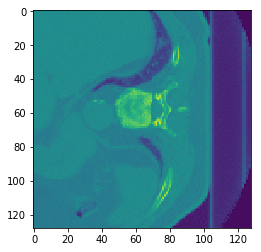

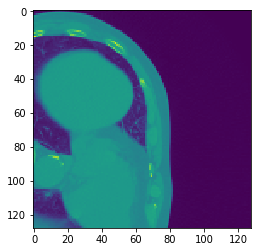

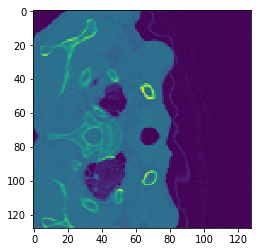

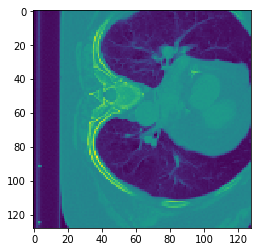

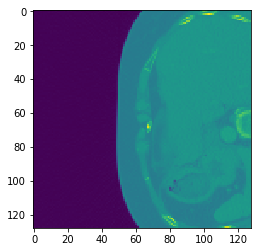

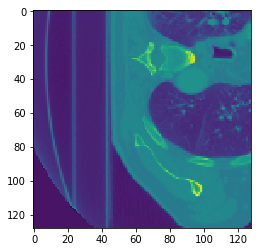

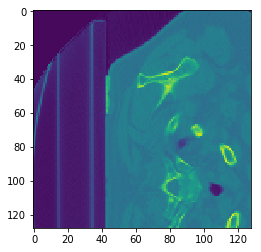

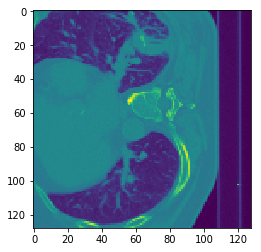

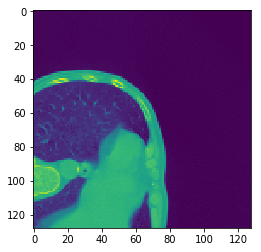

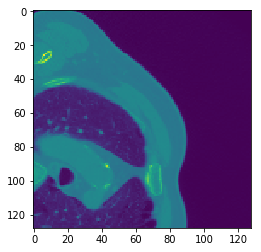

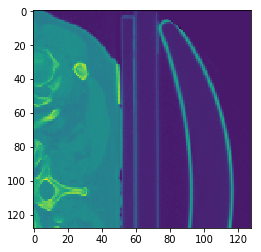

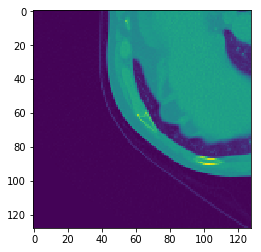

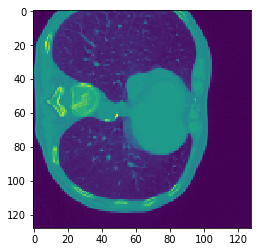

In [34]:
for batch in training_data_loader:
    data = batch[0][0].detach().cpu().numpy()
    
    plt.imshow(data[0,0,:,:,32])
    plt.show()